In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
header_file = open('assets/header.txt','r')
text = header_file.read()
text

'CPL_wrt_BC,\nclient_state,\nduration,\nnum_prods,\ncalls,\nCPL_wrt_self,\nchurn,\navg_budget,\nBC,\nclicks,\n'

In [3]:
header = text.split(',\n')[:-1]
header

['CPL_wrt_BC',
 'client_state',
 'duration',
 'num_prods',
 'calls',
 'CPL_wrt_self',
 'churn',
 'avg_budget',
 'BC',
 'clicks']

In [4]:
df = pd.read_csv('assets/data.csv',names=header)
df.head()

,CPL_wrt_BC,client_state,duration,num_prods,calls,CPL_wrt_self,churn,avg_budget,BC,clicks
0,0.000000,AZ,73,6,2,NaN,1,10082.152554,Beauty & Personal Care,107
1,-0.623618,CA,1,1,3,0.000000,0,133.928571,"Shopping, Collectibles & Gifts (General)",79
2,0.007905,NY,102,2,8,-0.292008,0,3935.017462,"Personal Services (Weddings, Cleaners, etc.)",90
3,-0.104900,MN,6,1,5,0.587206,0,461.538462,Travel,112
4,-0.013057,NJ,34,1,6,-0.955335,1,314.705882,Health & Fitness,95


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
CPL_wrt_BC      10000 non-null float64
client_state    10000 non-null object
duration        10000 non-null int64
num_prods       10000 non-null int64
calls           10000 non-null int64
CPL_wrt_self    8908 non-null float64
churn           10000 non-null int64
avg_budget      10000 non-null float64
BC              10000 non-null object
clicks          10000 non-null int64
dtypes: float64(3), int64(5), object(2)
memory usage: 781.3+ KB


In [6]:
df[df['CPL_wrt_self'].isna()]

,CPL_wrt_BC,client_state,duration,num_prods,calls,CPL_wrt_self,churn,avg_budget,BC,clicks
0,0.000000,AZ,73,6,2,NaN,1,10082.152554,Beauty & Personal Care,107
8,0.000000,MD,53,2,3,NaN,0,2812.286923,Home & Home Improvement,113
21,0.000000,WA,36,4,1,NaN,0,2257.655829,Home & Home Improvement,73
35,0.000000,CA,108,3,4,NaN,0,510.823940,Home & Home Improvement,132
68,0.000000,IL,40,4,8,NaN,0,7924.382535,Home & Home Improvement,65
85,0.000000,GA,62,4,2,NaN,0,1438.468633,Furniture,129
87,-0.111111,CA,56,2,4,NaN,1,2096.359612,Home & Home Improvement,131
105,0.000000,NY,36,3,2,NaN,0,2092.187653,Home & Home Improvement,65
108,0.000000,FL,31,2,9,NaN,0,1558.546529,Home & Home Improvement,97
114,-0.094938,NH,6,1,7,NaN,0,1606.624487,Automotive -- For Sale,101


**There is missing values in CPL_wrt_self**

In [7]:
file = open('assets/dict.txt')
file.read()

"CPL_wrt_BC=change in cost per lead with respect to business category\n\nclient_state=client's location\n\nduration=how long the client has been running advertising campaigns in months\n\nnum_prods=how many distinct advertising products the client has bought\n\ncalls=number of calls received\n\nCPL_wrt_self=change in client's cost per lead in the past three months\n\nchurn=target column (0=retention | 1=churn)\n\navg_budget=average monthly budget spent on advertising campaigns\n\nBC=client's business category\n\nclicks=number of clicks received\n"

In [8]:
with open("assets/dict.txt", "r") as ins:
    array = []
    for line in ins:
        array.append(line.strip())
array

['CPL_wrt_BC=change in cost per lead with respect to business category',
 '',
 "client_state=client's location",
 '',
 'duration=how long the client has been running advertising campaigns in months',
 '',
 'num_prods=how many distinct advertising products the client has bought',
 '',
 'calls=number of calls received',
 '',
 "CPL_wrt_self=change in client's cost per lead in the past three months",
 '',
 'churn=target column (0=retention | 1=churn)',
 '',
 'avg_budget=average monthly budget spent on advertising campaigns',
 '',
 "BC=client's business category",
 '',
 'clicks=number of clicks received']

In [9]:
desc = list(filter(None, array))
desc

['CPL_wrt_BC=change in cost per lead with respect to business category',
 "client_state=client's location",
 'duration=how long the client has been running advertising campaigns in months',
 'num_prods=how many distinct advertising products the client has bought',
 'calls=number of calls received',
 "CPL_wrt_self=change in client's cost per lead in the past three months",
 'churn=target column (0=retention | 1=churn)',
 'avg_budget=average monthly budget spent on advertising campaigns',
 "BC=client's business category",
 'clicks=number of clicks received']

In [10]:
df.head()

,CPL_wrt_BC,client_state,duration,num_prods,calls,CPL_wrt_self,churn,avg_budget,BC,clicks
0,0.000000,AZ,73,6,2,NaN,1,10082.152554,Beauty & Personal Care,107
1,-0.623618,CA,1,1,3,0.000000,0,133.928571,"Shopping, Collectibles & Gifts (General)",79
2,0.007905,NY,102,2,8,-0.292008,0,3935.017462,"Personal Services (Weddings, Cleaners, etc.)",90
3,-0.104900,MN,6,1,5,0.587206,0,461.538462,Travel,112
4,-0.013057,NJ,34,1,6,-0.955335,1,314.705882,Health & Fitness,95


In [11]:
# target variable
y = df.churn
y.shape

(10000,)

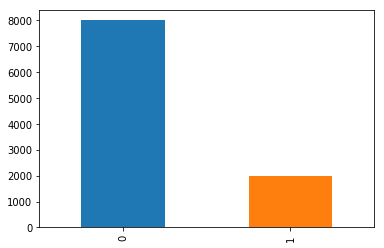

In [12]:
df.churn.value_counts().plot.bar()

In [13]:
df.describe()

,CPL_wrt_BC,duration,num_prods,calls,CPL_wrt_self,churn,avg_budget,clicks
count,10000.000000,10000.000000,10000.000000,10000.000000,8908.000000,10000.00000,10000.000000,10000.000000
mean,-0.068958,27.669200,1.327200,4.526100,0.602664,0.20000,1512.601132,99.214900
std,0.491693,25.500847,0.816582,2.859185,11.135854,0.40002,3473.160720,31.701757
min,-0.994590,1.000000,0.000000,0.000000,-1.000000,0.00000,9.090909,13.000000
25%,-0.103273,6.000000,1.000000,2.000000,-0.255226,0.00000,476.056955,76.000000
50%,-0.088810,19.000000,1.000000,5.000000,0.000000,0.00000,907.839383,96.000000
75%,-0.048530,42.000000,1.000000,7.000000,0.311280,0.00000,1666.499256,119.000000
max,19.088412,118.000000,11.000000,9.000000,841.288094,1.00000,148555.594376,253.000000


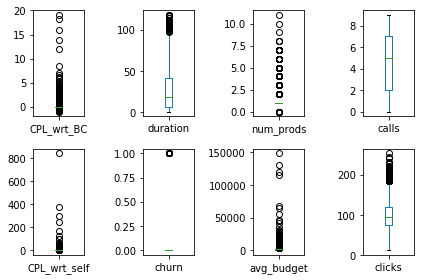

In [14]:
df.plot.box(subplots=True,layout=(2,4))
plt.tight_layout()
plt.show()

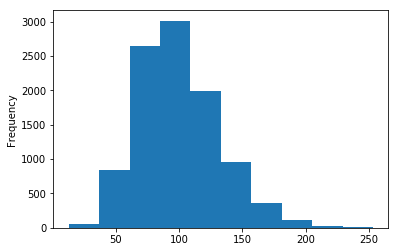

In [15]:
df.clicks.plot.hist()

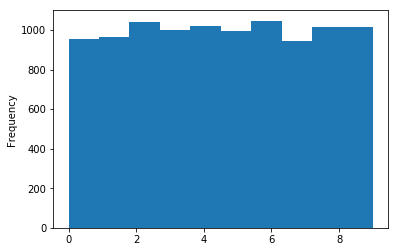

In [16]:
df.calls.plot.hist()

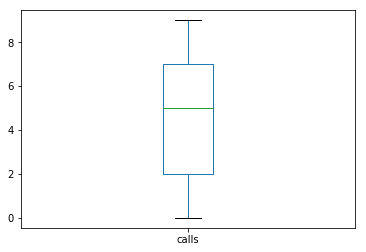

In [17]:
df.calls.plot.box()

In [18]:
df.BC.unique()

array(['Beauty & Personal Care',
       'Shopping, Collectibles & Gifts (General)',
       'Personal Services (Weddings, Cleaners, etc.)', 'Travel',
       'Health & Fitness', 'Education & Instruction', 'Business Services',
       'Home & Home Improvement', 'Animals & Pets',
       'Dentists & Dental Services', 'Physicians & Surgeons',
       'Automotive -- Repair, Service & Parts', 'Automotive -- For Sale',
       'Sports & Recreation', 'Industrial & Commercial',
       'Finance & Insurance', 'Real Estate', 'Restaurants & Food',
       'Computers, Telephony & Internet', 'Apparel / Fashion & Jewelry',
       'Attorneys & Legal Services', 'Farming & Agriculture', 'Furniture',
       'Toys & Hobbies', 'Career & Employment', 'Electronics & Photo',
       'Government & Politics', 'Arts & Entertainment',
       'Religion & Spirituality',
       'Community, Garage Sales & Organizations',
       'Business Opportunities'], dtype=object)

In [19]:
df.BC.value_counts().shape

(31,)

In [20]:
df.BC.value_counts()

Home & Home Improvement                         2610
Shopping, Collectibles & Gifts (General)         736
Automotive -- Repair, Service & Parts            624
Automotive -- For Sale                           516
Travel                                           512
Physicians & Surgeons                            505
Health & Fitness                                 499
Personal Services (Weddings, Cleaners, etc.)     475
Education & Instruction                          447
Attorneys & Legal Services                       415
Business Services                                389
Industrial & Commercial                          286
Furniture                                        281
Real Estate                                      280
Sports & Recreation                              259
Animals & Pets                                   221
Dentists & Dental Services                       218
Beauty & Personal Care                           196
Restaurants & Food                            

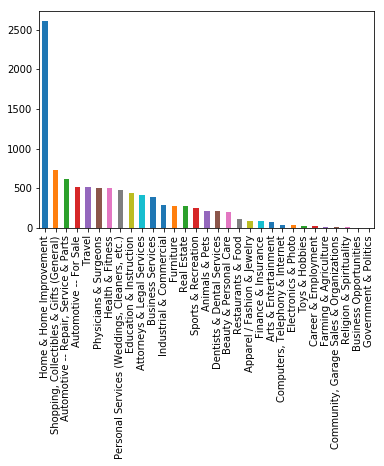

In [21]:
df.BC.value_counts().plot.bar()

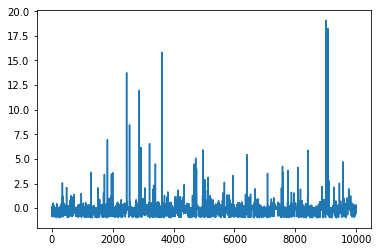

In [22]:
df['CPL_wrt_BC'].plot()

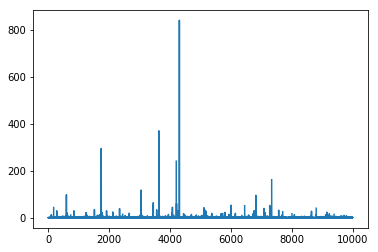

In [23]:
df['CPL_wrt_self'].plot()

In [24]:
df['client_state'].unique()

array(['AZ', 'CA', 'NY', 'MN', 'NJ', 'WA', 'OH', 'MD', 'ME', 'VA', 'TX',
       'OR', 'MO', 'IL', 'UT', 'FL', 'CO', 'GA', 'LA', 'MA', 'PA', 'MS',
       'TN', 'IN', 'NH', 'IA', 'NC', 'NE', 'KY', 'WI', 'VT', 'AK', 'AR',
       'CT', 'OK', 'MI', 'HI', 'SD', 'DC', 'NV', 'SC', 'AL', 'KS', 'ID',
       'ND', 'WV', 'RI', 'NM', 'DE', 'MT', 'WY'], dtype=object)

In [25]:
df['client_state'].unique().shape

(51,)

In [26]:
df['client_state'].value_counts()

CA    1745
TX     895
FL     746
NY     658
PA     564
IL     546
MD     380
GA     345
NJ     343
WA     315
VA     314
MA     299
OH     288
AZ     278
CO     278
MO     185
NC     183
OR     144
MN     137
IN     128
MI     110
TN      96
WI      90
LA      84
NV      66
SC      63
CT      54
ME      54
NH      53
UT      52
KS      51
AL      47
DC      42
RI      41
IA      40
MS      38
OK      36
KY      34
NE      29
DE      27
ID      23
HI      18
AR      18
SD      15
AK      10
MT      10
NM      10
VT       8
ND       6
WV       3
WY       1
Name: client_state, dtype: int64

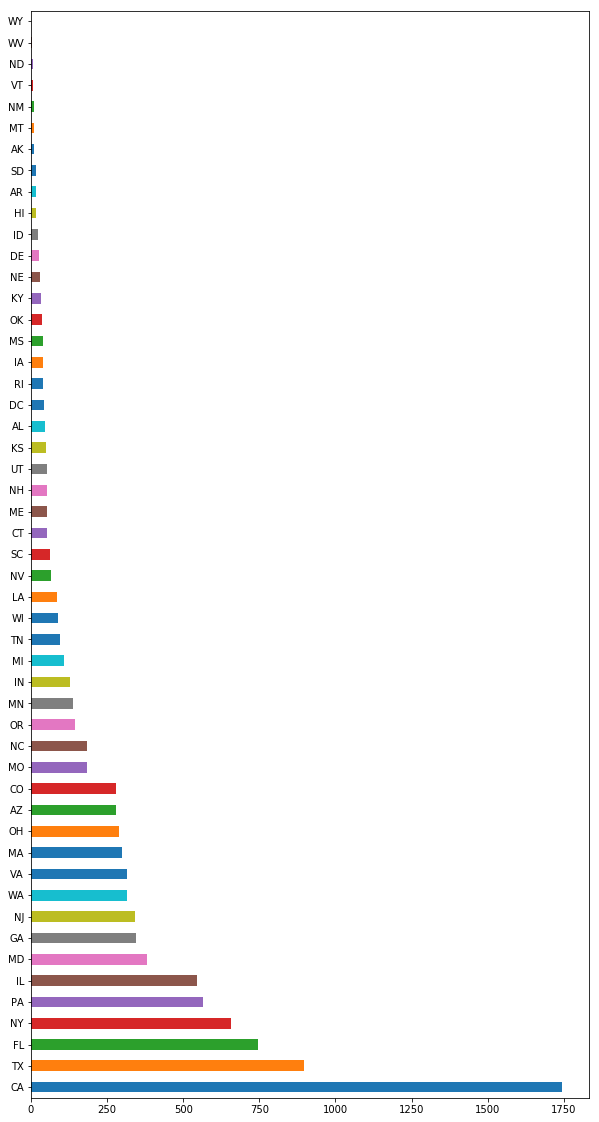

In [27]:
plt.figure(figsize=(10,20))
df['client_state'].value_counts().plot.barh()
plt.show()

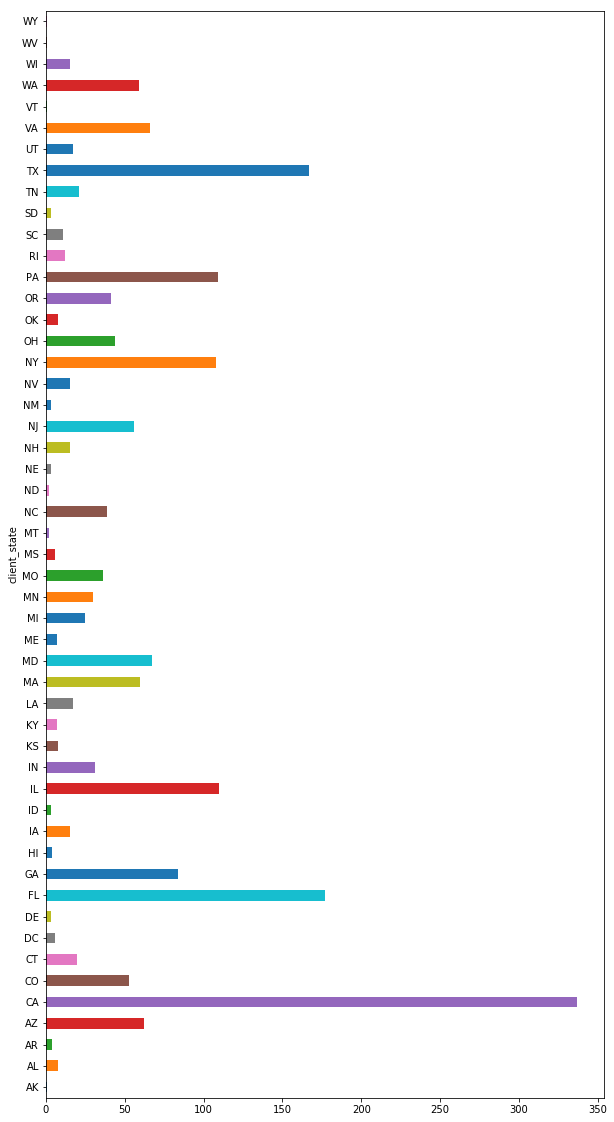

In [28]:
plt.figure(figsize=(10,20))
df.groupby(['client_state'])['churn'].sum().plot.barh()

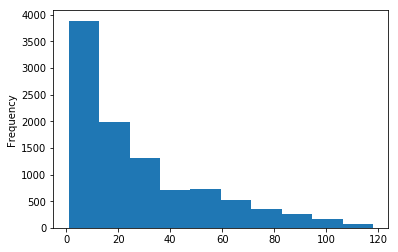

In [29]:
df.duration.plot.hist()

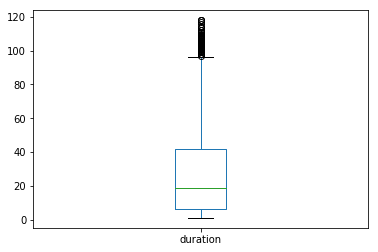

In [30]:
df.duration.plot.box()

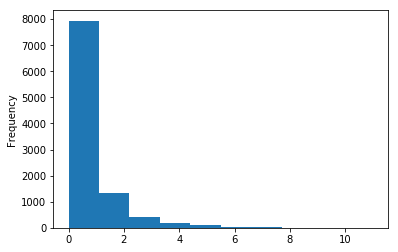

In [31]:
df.num_prods.plot.hist()

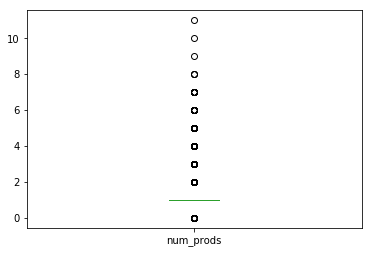

In [32]:
df.num_prods.plot.box()

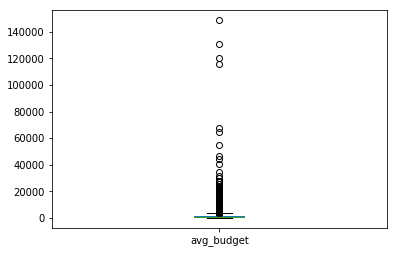

In [33]:
df['avg_budget'].plot.box()

In [34]:
df_nan = df[df['CPL_wrt_self'].isna()]
df_nan.head()

,CPL_wrt_BC,client_state,duration,num_prods,calls,CPL_wrt_self,churn,avg_budget,BC,clicks
0,0.0,AZ,73,6,2,NaN,1,10082.152554,Beauty & Personal Care,107
8,0.0,MD,53,2,3,NaN,0,2812.286923,Home & Home Improvement,113
21,0.0,WA,36,4,1,NaN,0,2257.655829,Home & Home Improvement,73
35,0.0,CA,108,3,4,NaN,0,510.823940,Home & Home Improvement,132
68,0.0,IL,40,4,8,NaN,0,7924.382535,Home & Home Improvement,65


In [35]:
df_nan.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1092 entries, 0 to 9986
Data columns (total 10 columns):
CPL_wrt_BC      1092 non-null float64
client_state    1092 non-null object
duration        1092 non-null int64
num_prods       1092 non-null int64
calls           1092 non-null int64
CPL_wrt_self    0 non-null float64
churn           1092 non-null int64
avg_budget      1092 non-null float64
BC              1092 non-null object
clicks          1092 non-null int64
dtypes: float64(3), int64(5), object(2)
memory usage: 93.8+ KB


In [36]:
df_nan.churn.value_counts()

0    839
1    253
Name: churn, dtype: int64

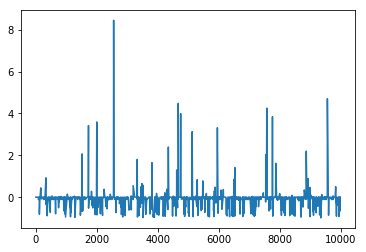

In [37]:
df_nan['CPL_wrt_BC'].plot()

In [38]:
df_1 = df[df['CPL_wrt_BC']>1]
df_1.describe()

,CPL_wrt_BC,duration,num_prods,calls,CPL_wrt_self,churn,avg_budget,clicks
count,81.000000,81.000000,81.000000,81.000000,62.000000,81.000000,81.000000,81.000000
mean,3.385573,5.333333,1.333333,4.419753,0.105172,0.209877,3667.321190,97.246914
std,3.636867,10.762202,0.894427,2.592606,1.294009,0.409758,7779.903722,29.609344
min,1.038974,1.000000,0.000000,0.000000,-0.995357,0.000000,59.375000,49.000000
25%,1.372738,1.000000,1.000000,3.000000,0.000000,0.000000,700.000000,73.000000
50%,2.029839,1.000000,1.000000,4.000000,0.000000,0.000000,1500.000000,91.000000
75%,3.637539,3.000000,1.000000,6.000000,0.000000,0.000000,3484.347507,115.000000
max,19.088412,60.000000,7.000000,9.000000,9.625056,1.000000,64764.472238,166.000000


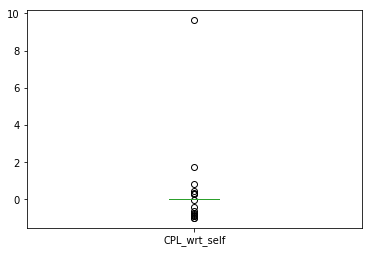

In [39]:
df_1['CPL_wrt_self'].plot.box()

In [40]:
df[df['CPL_wrt_self']>19]

,CPL_wrt_BC,client_state,duration,num_prods,calls,CPL_wrt_self,churn,avg_budget,BC,clicks
178,-0.086006,VA,38,2,1,43.376570,0,1104.181616,Physicians & Surgeons,127
278,0.043041,PA,3,1,9,29.251202,0,1000.000000,Travel,93
596,0.069386,CA,34,2,4,97.627563,0,1841.359206,Beauty & Personal Care,156
610,0.325024,NV,3,2,9,20.677791,1,3479.259259,Travel,44
839,0.081295,TX,18,2,3,29.221723,0,29791.820917,Home & Home Improvement,92
1242,-0.100993,OH,3,1,7,21.788560,0,580.645161,"Personal Services (Weddings, Cleaners, etc.)",129
1516,-0.078678,MA,3,1,9,34.565165,0,1060.000000,Restaurants & Food,122
1740,-0.084193,PA,11,2,1,294.862391,0,2065.100866,Home & Home Improvement,110
1770,-0.095232,MA,3,1,3,21.803477,0,813.333333,Health & Fitness,92
1915,-0.109237,NJ,51,1,5,29.348075,0,154.761983,"Automotive -- Repair, Service & Parts",81


In [41]:
df[df['CPL_wrt_self']>19].shape

(43, 10)

In [42]:
df[df['CPL_wrt_self']>19].describe()

,CPL_wrt_BC,duration,num_prods,calls,CPL_wrt_self,churn,avg_budget,clicks
count,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000
mean,-0.040873,14.674419,1.558140,5.046512,79.021876,0.139535,2108.067060,98.604651
std,0.096202,15.649009,0.589686,2.759861,140.104436,0.350605,4612.856727,28.153609
min,-0.109237,3.000000,1.000000,0.000000,19.133724,0.000000,154.761983,44.000000
25%,-0.095412,3.000000,1.000000,3.000000,24.852709,0.000000,540.322581,80.500000
50%,-0.082294,9.000000,2.000000,5.000000,33.436172,0.000000,1040.299386,93.000000
75%,-0.044078,18.000000,2.000000,7.500000,52.825000,0.000000,1701.095616,120.000000
max,0.325024,73.000000,3.000000,9.000000,841.288094,1.000000,29791.820917,171.000000


In [43]:
df[df['avg_budget']>4000]

,CPL_wrt_BC,client_state,duration,num_prods,calls,CPL_wrt_self,churn,avg_budget,BC,clicks
0,0.000000,AZ,73,6,2,NaN,1,10082.152554,Beauty & Personal Care,107
7,-0.036812,NY,6,1,4,-0.376698,1,5376.736111,Business Services,118
23,-0.077863,CA,42,2,8,0.190711,0,4023.538871,Home & Home Improvement,125
45,-0.077805,NY,18,1,1,0.443906,0,5752.671622,Dentists & Dental Services,134
56,-0.090751,CA,49,2,0,0.775039,0,6388.037394,Home & Home Improvement,53
68,0.000000,IL,40,4,8,NaN,0,7924.382535,Home & Home Improvement,65
76,-0.012664,CO,6,1,6,0.015878,0,5408.333333,Home & Home Improvement,83
107,-0.093159,OR,3,1,9,0.640118,0,4190.476190,Automotive -- For Sale,113
116,-0.108557,NY,60,2,1,0.290908,0,5295.691393,Education & Instruction,62
164,0.056453,FL,8,1,6,-0.492235,1,5004.807692,Attorneys & Legal Services,128


In [44]:
df[df.churn==1]

,CPL_wrt_BC,client_state,duration,num_prods,calls,CPL_wrt_self,churn,avg_budget,BC,clicks
0,0.000000,AZ,73,6,2,NaN,1,10082.152554,Beauty & Personal Care,107
4,-0.013057,NJ,34,1,6,-0.955335,1,314.705882,Health & Fitness,95
7,-0.036812,NY,6,1,4,-0.376698,1,5376.736111,Business Services,118
9,-0.108222,NY,45,1,6,-0.176777,1,1178.372327,Education & Instruction,104
12,-0.015417,TX,29,1,7,-0.653486,1,1408.545727,Home & Home Improvement,100
17,-0.062327,TX,8,1,5,-0.833591,1,625.000000,Home & Home Improvement,85
27,0.334966,UT,15,3,8,0.262987,1,3266.800831,Home & Home Improvement,63
29,-0.106885,CO,7,1,9,-0.112059,1,3048.571429,Home & Home Improvement,74
43,-0.063649,LA,12,1,2,-1.000000,1,747.222222,Real Estate,145
60,-0.014109,PA,13,1,2,0.091317,1,648.275862,Animals & Pets,116


In [45]:
df[df.churn==1].describe()

,CPL_wrt_BC,duration,num_prods,calls,CPL_wrt_self,churn,avg_budget,clicks
count,2000.000000,2000.000000,2000.000000,2000.000000,1747.000000,2000.0,2000.000000,2000.000000
mean,-0.069096,23.036000,1.250000,4.522500,0.188527,1.0,1237.311735,99.389000
std,0.565726,23.717735,0.702671,2.820545,3.122606,0.0,3715.808992,31.368897
min,-0.994590,1.000000,0.000000,0.000000,-1.000000,1.0,15.673473,25.000000
25%,-0.105513,5.000000,1.000000,2.000000,-0.521494,1.0,385.474138,77.000000
50%,-0.088925,14.000000,1.000000,5.000000,-0.065336,1.0,712.107220,96.000000
75%,-0.047026,33.000000,1.000000,7.000000,0.085906,1.0,1373.648913,119.000000
max,15.833537,118.000000,7.000000,9.000000,95.279825,1.0,148555.594376,219.000000


c:\users\mdv28\appdata\local\continuum\miniconda3\envs\mm\lib\site-packages\matplotlib\axes\_axes.py:6510: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


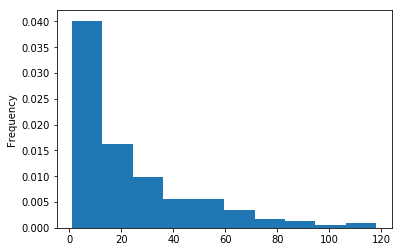

In [46]:
df[df.churn==1].duration.plot.hist(normed=True)

In [47]:
np.histogram(df[df.churn==1].duration)

(array([939, 379, 232, 130, 132,  82,  39,  32,  13,  22], dtype=int64),
 array([  1. ,  12.7,  24.4,  36.1,  47.8,  59.5,  71.2,  82.9,  94.6,
        106.3, 118. ]))

In [48]:
df[df['CPL_wrt_self']==0]

,CPL_wrt_BC,client_state,duration,num_prods,calls,CPL_wrt_self,churn,avg_budget,BC,clicks
1,-0.623618,CA,1,1,3,0.0,0,133.928571,"Shopping, Collectibles & Gifts (General)",79
10,-0.870386,ME,1,1,6,0.0,0,142.857143,"Shopping, Collectibles & Gifts (General)",147
31,-0.809631,MD,1,1,7,0.0,0,144.000000,"Shopping, Collectibles & Gifts (General)",96
42,0.000000,GA,34,2,8,0.0,0,2784.575947,Physicians & Surgeons,48
61,-0.845138,CA,1,1,1,0.0,0,60.714286,"Shopping, Collectibles & Gifts (General)",61
65,-0.429082,FL,1,1,8,0.0,0,776.724138,Home & Home Improvement,124
75,0.000000,CA,23,2,3,0.0,0,1113.921739,Sports & Recreation,82
77,-0.109799,TN,2,1,2,0.0,0,2034.482759,Home & Home Improvement,93
82,-0.083496,FL,2,1,8,0.0,1,687.500000,Home & Home Improvement,112
88,-0.103219,TX,20,1,5,0.0,1,508.990385,Home & Home Improvement,75


In [49]:
df[df['avg_budget']>2000].churn.value_counts()

0    1617
1     265
Name: churn, dtype: int64